<a href="https://colab.research.google.com/github/Deepthi2701/Image-Encryption/blob/main/ImageEncryption_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [506]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [507]:
inputImage = cv2.imread('/content/imageEncryption.webp')

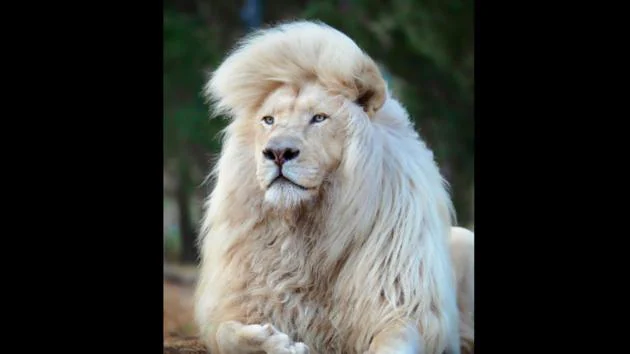

In [508]:
cv2_imshow(inputImage)

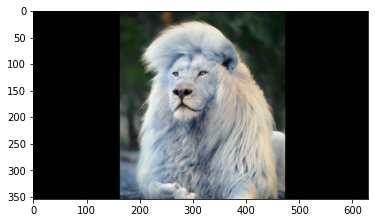

In [509]:
plt.imshow(inputImage,cmap = 'gray')

# **RSA Algorithm :**
## **Step 1:**  Generate the RSA modulus
The initial procedure begins with selection of two prime numbers namely p and q, and then calculating their product N

In [510]:
pip install pycrypto

In [511]:
from Crypto.Util import number
n=5
num1 = number.getPrime(n)   #num1 -> p
num2 = number.getPrime(n)   #num2 -> q
print(num1)
print(num2)

17
19


In [512]:
N = num1 * num2
print(N)

323


## **Step 2:** Generate Derived Number (e)
Consider number e as a derived number which should be greater than 1 and less than (p-1) and (q-1). The primary condition will be that there should be no common factor of (p-1) and (q-1) except 1


In [513]:
e = (num1-1)*(num2-1)
print(e)

288


## **Step 3:** Public Key
The specified pair of numbers N and e forms the RSA public key and it is made public.Find 'key' such that GCD(key,e)=1 such that it satisfies this condition 1<key<e 

In [514]:
def computeGCD(x, y):  
   while(y):

       x, y = y, x % y  
   return x

key = number.getPrime(4)
while computeGCD(key,e) != 1:
    key = number.getPrime(4);

print(key)    


11


## **Step 4:** Private Key
Private Key d is calculated from the numbers num1, num2 and e. The mathematical relationship between the numbers is as follows - 
d = 1 mod (num1-1) (num2-1)
The above formula is the basic formula for Extended Euclidean Algorithm, which takes p and q as the input parameters.

In [515]:
def gcdExtended(a, b):
 
    if a == 0:
        return b, 0, 1
    else:
        gcd, x, y = gcdExtended(b % a, a)
        return gcd, y - (b // a) * x, x    
 


In [516]:
x,d,y = gcdExtended(key,e)
d = abs(d)
print(d)

131


## **Step 5:** Encryption
Consider a sender who sends the plain text message to someone whose public key is (N,e). 

In [517]:
def power(a,d,n):
  ans=1;
  while d!=0:
    if d%2==1:
      ans=((ans%n)*(a%n))%n
    a=((a%n)*(a%n))%n
    d>>=1
  return ans;

In [518]:
row = inputImage.shape[0]
col = inputImage.shape[1]
enc = [[0 for x in range(2000)] for y in range(2000)]

In [519]:
print(row)
print(col)

354
630


In [520]:
for i in range(0,row):
  for j in range(0,col):
     r,g,b=inputImage[i,j]
     C1=power(r,key,N)
     C2=power(g,key,N)
     C3=power(b,key,N)
     enc[i][j]=[C1,C2,C3]
     C1=C1%192
     C2=C2%192
     C3=C3%192
     inputImage[i,j]=[C1,C2,C3]
      

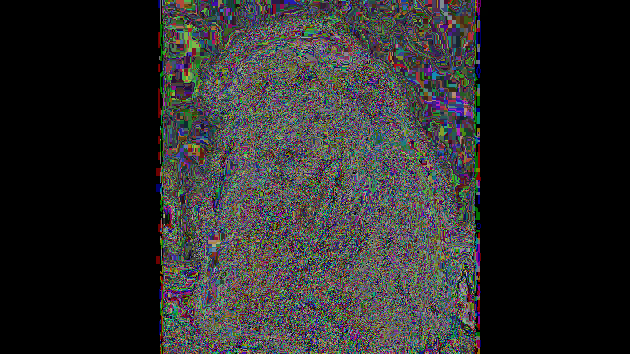

In [521]:
cv2_imshow(inputImage)

## **Step 6:** Decryption
The decryption process is very straightforward and includes analytics for calculation in a systematic approach.

In [522]:
for i in range(0,row):
  for j in range(0,col):
    r,g,b=enc[i][j]
    M1=power(r,d,N)
    M2=power(g,d,N)
    M3=power(b,d,N)
    inputImage[i,j]=[M1,M2,M3]



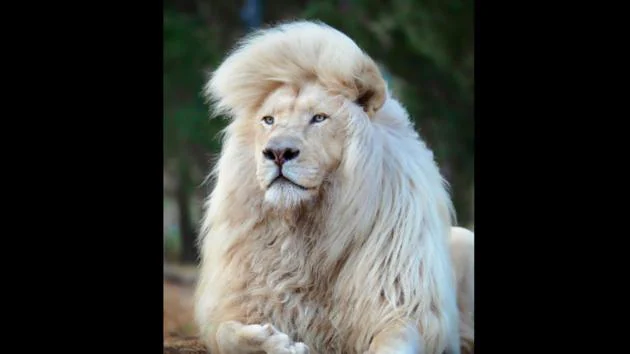

In [523]:
cv2_imshow(inputImage)